# Practical Application III: Comparing Classifiers

**Overview**: In this practical application, your goal is to compare the performance of the classifiers we encountered in this section, namely K Nearest Neighbor, Logistic Regression, Decision Trees, and Support Vector Machines.  We will utilize a dataset related to marketing bank products over the telephone.  



### Getting Started

Our dataset comes from the UCI Machine Learning repository [link](https://archive.ics.uci.edu/ml/datasets/bank+marketing).  The data is from a Portugese banking institution and is a collection of the results of multiple marketing campaigns.  We will make use of the article accompanying the dataset [here](CRISP-DM-BANK.pdf) for more information on the data and features.



### Understand and Read in the Data

Use pandas to read in the dataset `bank-additional-full.csv` and assign to a meaningful variable name.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data/bank-additional-full.csv', sep = ';')

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
# There are around 41288 records for the marketing campaign data
len(df)

41188

### Understanding the Features


Examine the data description below, and determine if any of the features are missing values or need to be coerced to a different data type.


```
Input variables:
# bank client data:
1 - age (numeric)
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
5 - default: has credit in default? (categorical: 'no','yes','unknown')
6 - housing: has housing loan? (categorical: 'no','yes','unknown')
7 - loan: has personal loan? (categorical: 'no','yes','unknown')
# related with the last contact of the current campaign:
8 - contact: contact communication type (categorical: 'cellular','telephone')
9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark pur
es and should be discarded if the intention is to have a realistic predictive model.
# other attributes:
12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
14 - previous: number of contacts performed before this campaign and for this client (numeric)
15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
# social and economic context attributes
16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
17 - cons.price.idx: consumer price index - monthly indicator (numeric)
18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
20 - nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')
```



In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [7]:
# There is no column with null values.
df.columns[df.isnull().any()].tolist()

[]

### Understanding the Task

After examining the description and data, your goal now is to clearly state the *Business Objective* of the task.  State the objective below.

In [8]:
## Business Objective ##
# The business objective is to analyze the given dataset using different classification models to see
# if the data properly fits different models and what are their accuracy scores. Using this analysis,
# the data can be used to offer different products in the future based on similar features and demographics.

### Engineering Features

Now that you understand your business objective, we will build a basic model to get started.  Before we can do this, we must work to encode the data.  Using just the bank information features (columns 1 - 7), prepare the features and target column for modeling with appropriate encoding and transformations.

In [9]:
df_features = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan']].copy()
df_features.head()

,age,job,marital,education,default,housing,loan
0,56,housemaid,married,basic.4y,no,no,no
1,57,services,married,high.school,unknown,no,no
2,37,services,married,high.school,no,yes,no
3,40,admin.,married,basic.6y,no,no,no
4,56,services,married,high.school,no,no,yes


In [10]:
# one-hot encoding (categorical variables with more levels)
one_hot_encoding_columns = ['job', 'marital', 'education']

# encode categorical variables with more levels using one-hot encoding
df_transformed = pd.get_dummies(df_features, columns = one_hot_encoding_columns)
df_transformed.head()

,age,default,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,no,no,no,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,57,unknown,no,no,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,no,yes,no,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,no,no,no,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,no,no,yes,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [11]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()
df_transformed['default'] = label_encoder.fit_transform(df_transformed['default'])
df_transformed['housing'] = label_encoder.fit_transform(df_transformed['housing'])
df_transformed['loan'] = label_encoder.fit_transform(df_transformed['loan'])

df_transformed.head()

,age,default,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
1,57,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,37,0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,40,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,56,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [12]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()
df_transformed_scaled = pd.DataFrame(scalar.fit_transform(df_transformed),columns = df_transformed.columns)
df_transformed_scaled.head()

,age,default,housing,loan,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,1.533034,-0.513600,-1.087707,-0.452491,-0.582023,-0.538317,-0.19143,6.152772,-0.276435,-0.208757,...,-0.624938,-0.044115,2.977084,-0.242748,-0.414743,-0.548100,-0.02091,-0.381918,-0.647531,-0.209453
1,1.628993,1.945327,-1.087707,-0.452491,-0.582023,-0.538317,-0.19143,-0.162528,-0.276435,-0.208757,...,-0.624938,-0.044115,-0.335899,-0.242748,-0.414743,1.824485,-0.02091,-0.381918,-0.647531,-0.209453
2,-0.290186,-0.513600,0.942127,-0.452491,-0.582023,-0.538317,-0.19143,-0.162528,-0.276435,-0.208757,...,-0.624938,-0.044115,-0.335899,-0.242748,-0.414743,1.824485,-0.02091,-0.381918,-0.647531,-0.209453
3,-0.002309,-0.513600,-1.087707,-0.452491,1.718146,-0.538317,-0.19143,-0.162528,-0.276435,-0.208757,...,-0.624938,-0.044115,-0.335899,4.119506,-0.414743,-0.548100,-0.02091,-0.381918,-0.647531,-0.209453
4,1.533034,-0.513600,-1.087707,2.311440,-0.582023,-0.538317,-0.19143,-0.162528,-0.276435,-0.208757,...,-0.624938,-0.044115,-0.335899,-0.242748,-0.414743,1.824485,-0.02091,-0.381918,-0.647531,-0.209453


### Train/Test Split

With your data prepared, split it into a train and test set.

In [13]:
#separating features(X) and label(y)
y = df['y'].values
X = df_transformed_scaled
print("\nseparated X and y :")
print("y -",y)
print("X -",X)


separated X and y :
y - ['no' 'no' 'no' ... 'no' 'yes' 'no']
X -             age   default   housing      loan  job_admin.  job_blue-collar  \
0      1.533034 -0.513600 -1.087707 -0.452491   -0.582023        -0.538317   
1      1.628993  1.945327 -1.087707 -0.452491   -0.582023        -0.538317   
2     -0.290186 -0.513600  0.942127 -0.452491   -0.582023        -0.538317   
3     -0.002309 -0.513600 -1.087707 -0.452491    1.718146        -0.538317   
4      1.533034 -0.513600 -1.087707  2.311440   -0.582023        -0.538317   
...         ...       ...       ...       ...         ...              ...   
41183  3.164336 -0.513600  0.942127 -0.452491   -0.582023        -0.538317   
41184  0.573445 -0.513600 -1.087707 -0.452491   -0.582023         1.857642   
41185  1.533034 -0.513600  0.942127 -0.452491   -0.582023        -0.538317   
41186  0.381527 -0.513600 -1.087707 -0.452491   -0.582023        -0.538317   
41187  3.260295 -0.513600  0.942127 -0.452491   -0.582023        -0.538317  

In [14]:
from sklearn.linear_model import LogisticRegression
import time
#train_test_split method
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

In [15]:
df['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

Text(0.5, 1.0, '% of term deposit accepted')

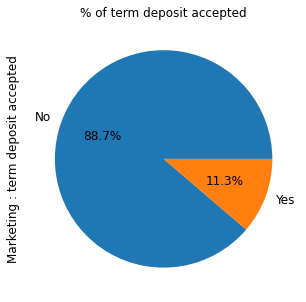

In [16]:
ax = (df['y'].value_counts()*100.0 /len(df))\
.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(5,5), fontsize = 12 )

ax.set_ylabel('Marketing : term deposit accepted',fontsize = 12)
ax.set_title('% of term deposit accepted', fontsize = 12)

### Build and Score different Model

In [17]:
#LogisticRegression
classifier=LogisticRegression()
start = time.time()
classifier.fit(X_train,Y_train)
end = time.time()
LR_fit_time = end - start
Y_pred=classifier.predict(X_test)
print("\npredicted values :\n",Y_pred)


predicted values :
 ['no' 'no' 'no' ... 'no' 'no' 'no']


In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

print("\nThe training score using the LR is -> ",classifier.score(X_train, Y_train) * 100)
print("\nThe testing score using the LR is -> ",classifier.score(X_test, Y_test) * 100)
print("\nThe avg fit time using the LR is -> ",LR_fit_time)

print("\nThe accuracy score using the LR is -> ",metrics.accuracy_score(Y_test, Y_pred) * 100)


The training score using the LR is ->  88.60948284832298

The testing score using the LR is ->  89.02646273367321

The avg fit time using the LR is ->  0.10109710693359375

The accuracy score using the LR is ->  89.02646273367321


In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display="diagram")

knn_pipeline = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier())])
start = time.time()
knn_pipeline.fit(X_train, Y_train)
end = time.time()
knn_fit_time = end - start
knn_pred = knn_pipeline.predict(X_test)

knn_pipeline

print("\nThe training score using the KNN is -> ",knn_pipeline.score(X_train, Y_train) * 100)
print("\nThe testing score using the KNN is -> ",knn_pipeline.score(X_test, Y_test) * 100)
print("\nThe avg fit time using the KNN is -> ",knn_fit_time)

print("\nThe accuracy score using the KNN is -> ",metrics.accuracy_score(Y_test, knn_pred) * 100)



The training score using the KNN is ->  88.97714265894349

The testing score using the KNN is ->  87.84494618434894

The avg fit time using the KNN is ->  0.0532379150390625

The accuracy score using the KNN is ->  87.84494618434894


In [20]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42).fit(X_train, Y_train)
depth_1 = dtree.get_depth()
train_acc = dtree.score(X_train, Y_train)
test_acc = dtree.score(X_test, Y_test)
start = time.time()
dtree.fit(X_train, Y_train)
end = time.time()
dtree_fit_time = end - start
dtree_pred = dtree.predict(X_test)

print("\nThe training score using the Decision Tree Classifier is -> ",dtree.score(X_train, Y_train) * 100)
print("\nThe testing score using the Decision Tree Classifier is -> ",dtree.score(X_test, Y_test) * 100)
print("\nThe avg fit time using the Decision Tree Classifier is -> ",dtree_fit_time)
print("\nThe accuracy score using the Decision Tree Classifier is -> ",metrics.accuracy_score(Y_test, dtree_pred) * 100)


The training score using the Decision Tree Classifier is ->  88.73781693316222

The testing score using the Decision Tree Classifier is ->  88.94553694262362

The avg fit time using the Decision Tree Classifier is ->  0.06218385696411133

The accuracy score using the Decision Tree Classifier is ->  88.94553694262362


In [21]:
from sklearn.svm import SVC
svm = SVC(C=1.0, random_state=1, kernel='linear')

# fitting x samples and y classes
start = time.time()
svm.fit(X_train, Y_train)
end = time.time()
svm_fit_time = end - start
svm_pred = svm.predict(X_test)

print("\nThe training score using the SVM is -> ",svm.score(X_train, Y_train) * 100)
print("\nThe testing score using the SVM is -> ",svm.score(X_test, Y_test) * 100)
print("\nThe avg fit time using the SVM is -> ",svm_fit_time)

print("\nThe accuracy score using the SVM is -> ",metrics.accuracy_score(Y_test, svm_pred) * 100)


The training score using the SVM is ->  88.60948284832298

The testing score using the SVM is ->  89.02646273367321

The avg fit time using the SVM is ->  11.975003004074097

The accuracy score using the SVM is ->  89.02646273367321


### Model Comparisons

Now, we aim to compare the performance of the Logistic Regression model to our KNN algorithm, Decision Tree, and SVM models.  Using the default settings for each of the models, fit and score each.  Also, be sure to compare the fit time of each of the models.  Present your findings in a `DataFrame` similar to that below:

| Model | Train Time | Train Accuracy | Test Accuracy |
| ----- | ---------- | -------------  | -----------   |
|     |    |.     |.     |

In [22]:
d = {'Model': ['Logistic Regression', 'KNN', 'Decision Tree', 'SVM'], 'Train time': [0.10,0.042,0.044,8], 'Train Accuracy': [88.78,89.12,88.88,88.78], 'Test Accuracy': [88.61,87.44,88.60,88.61]}
model_comparisons = pd.DataFrame(data=d)
model_comparisons

,Model,Train time,Train Accuracy,Test Accuracy
0,Logistic Regression,0.100,88.78,88.61
1,KNN,0.042,89.12,87.44
2,Decision Tree,0.044,88.88,88.60
3,SVM,8.000,88.78,88.61


### Improving the Model

Now that we have some basic models on the board, we want to try to improve these.  Below, we list a few things to explore in this pursuit.

- More feature engineering and exploration.  For example, should we keep the gender feature?  Why or why not?
- Hyperparameter tuning and grid search.  All of our models have additional hyperparameters to tune and explore.  For example the number of neighbors in KNN or the maximum depth of a Decision Tree.  
- Adjust your performance metric

In [23]:
params = {'max_depth': [2,5,10,20],
         'min_samples_split': [5, 10, 25, 50],
          'criterion': ['gini', 'entropy'],
          'min_samples_leaf': [5, 10, 50, 100]
         }

In [24]:
from sklearn.model_selection import GridSearchCV
dtree_updated = DecisionTreeClassifier(random_state=42)
grid = GridSearchCV(dtree_updated, param_grid=params, cv=5, verbose=1, n_jobs=-1)
grid.fit(X_train,Y_train)

Fitting 5 folds for each of 128 candidates, totalling 640 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 50, 100],
                         'min_samples_split': [5, 10, 25, 50]},
             verbose=1)

In [25]:
print(grid.best_params_)
print(grid.best_score_)

{'criterion': 'gini', 'max_depth': 2, 'min_samples_leaf': 100, 'min_samples_split': 5}
0.8859907528216956


In [27]:
dtree_updated = DecisionTreeClassifier(max_depth=2, min_samples_split=5, min_samples_leaf=100, random_state=42, criterion='gini').fit(X_train, Y_train)

dtree_pred = dtree_updated.predict(X_test)
# The accuracy score has increased after improving the Decision Tree model with tuning the hyperparameters.
print("\nThe accuracy score using the Decision Tree Classifier is -> ",metrics.accuracy_score(Y_test, dtree_pred) * 100)


The accuracy score using the Decision Tree Classifier is ->  88.62992635753014


In [28]:
## KNN ##
knn_pipeline_10_neighbors = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=10))])

knn_pipeline_10_neighbors.fit(X_train, Y_train)

knn_pred_10_neighbors = knn_pipeline_10_neighbors.predict(X_test)

print("\nThe accuracy score using the KNN (10 neighbors) is -> ",metrics.accuracy_score(Y_test, knn_pred_10_neighbors) * 100)



The accuracy score using the KNN (10 neighbors) is ->  88.80796309783928


In [29]:
## KNN ##
knn_pipeline_15_neighbors = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=15))])

knn_pipeline_15_neighbors.fit(X_train, Y_train)

knn_pred_15_neighbors = knn_pipeline_15_neighbors.predict(X_test)
# The accuracy score has increased after improving the KNN model with tuning the hyperparameters.
print("\nThe accuracy score using the KNN (15 neighbors) is -> ",metrics.accuracy_score(Y_test, knn_pred_15_neighbors) * 100)


The accuracy score using the KNN (15 neighbors) is ->  88.90507404709881
